In [1]:
# Download and Extract Dataset

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [2]:
fetch_housing_data()

In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [8]:
## Ocean Proximity is Categorically Feature

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


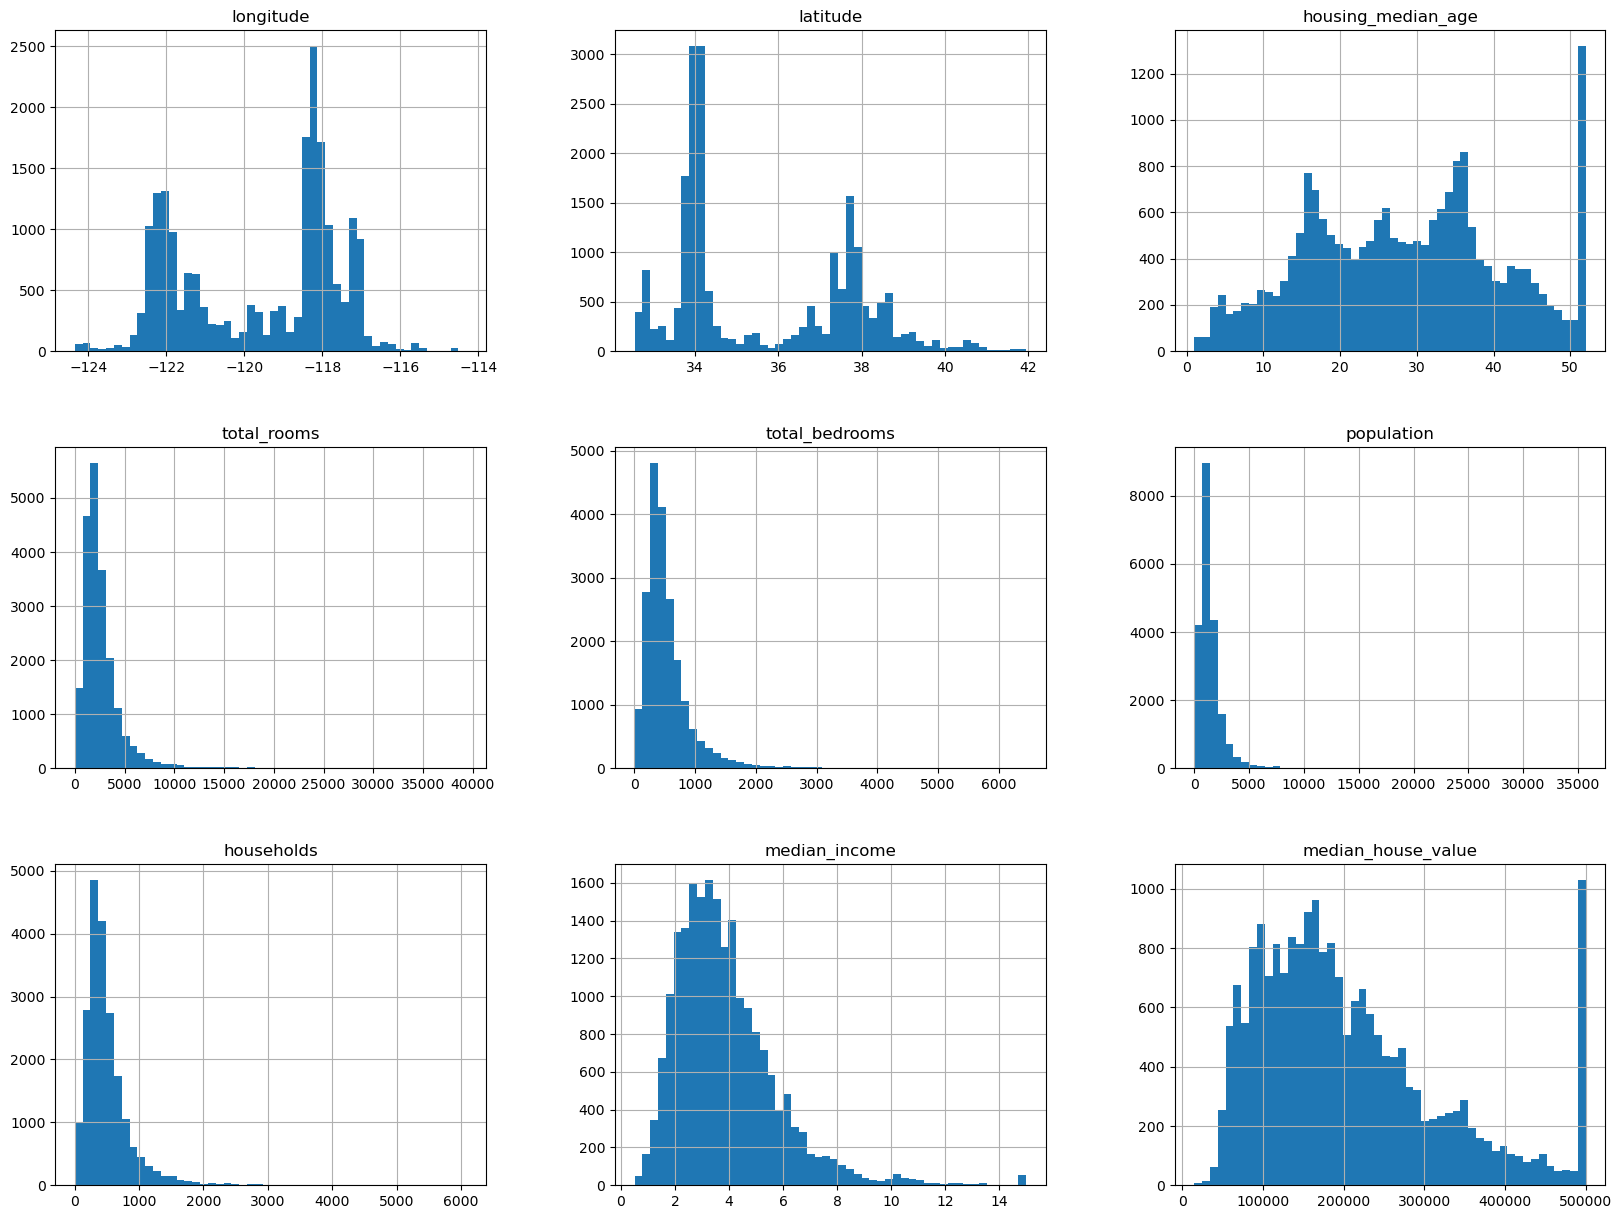

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
# Create Test Set

import numpy as np

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]



In [12]:
train_set, test_set = split_train_test(housing, 0.2) # ->  it will generate a different test set! 
print("Train set: " + str(len(train_set)))
print("Test set: "+ str(len(test_set)) )

Train set: 16512
Test set: 4128


In [13]:
# Created Identifers function to check if it is test set instance or not
from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
    
def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
                

In [14]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [15]:
# a district’s latitude and longitude are guaranteed to be stable for a few 
# million years, so you could combine them into an ID like so:

# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [16]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [17]:
from sklearn.model_selection import train_test_split

train_set,test_split = train_test_split(housing,test_size=0.2,random_state=42)

In [18]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

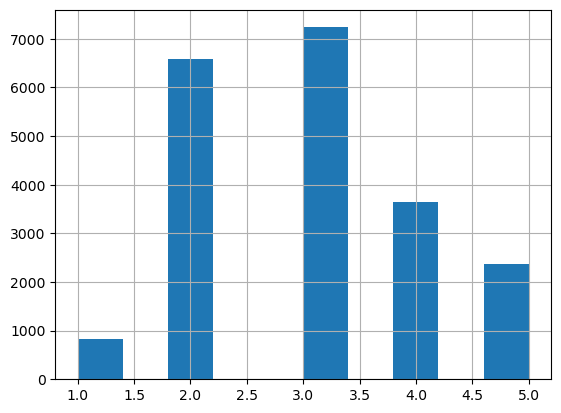

In [19]:
housing["income_cat"].hist()

In [20]:
#Finding Probability of each category using Stratified Sampling 
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [21]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [22]:
# Removing "income_cat" attribute

for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

housing = strat_train_set.copy()

# Data Visualization 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

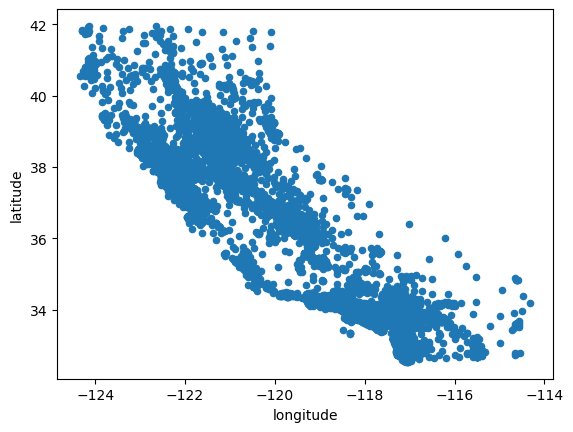

In [23]:
# Geographical information (latitude and longitude), it is a good idea to
#create a scatterplot of all districts


housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

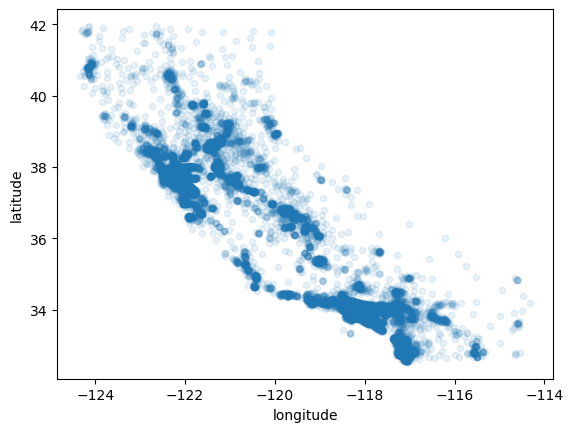

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

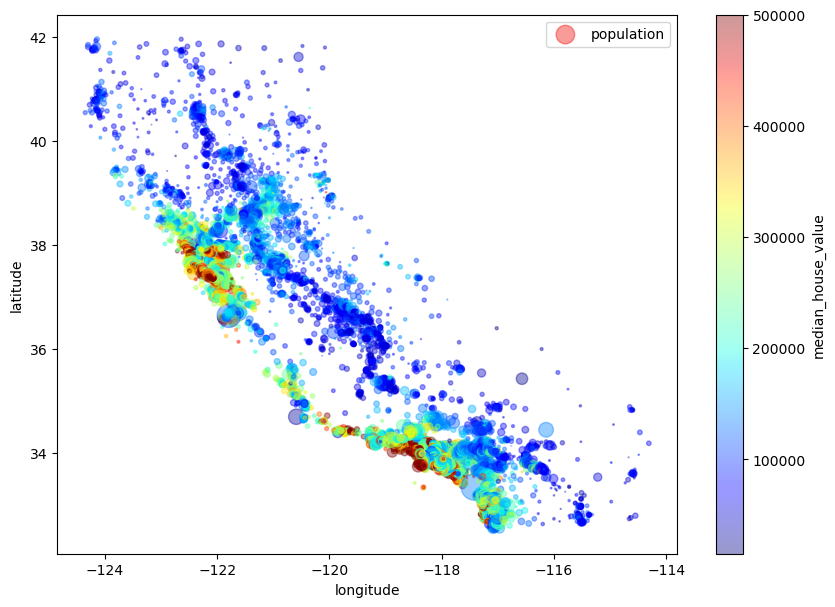

In [25]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
            )

plt.legend()

In [26]:
# Finding Correlation

corr_matrix = housing.corr()

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

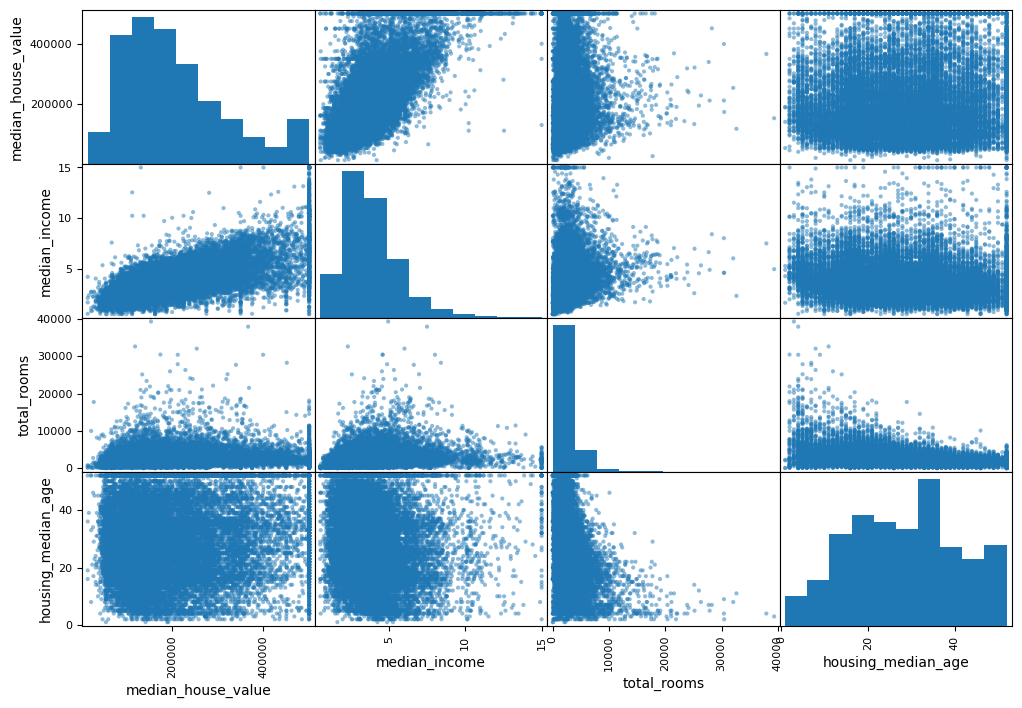

In [28]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

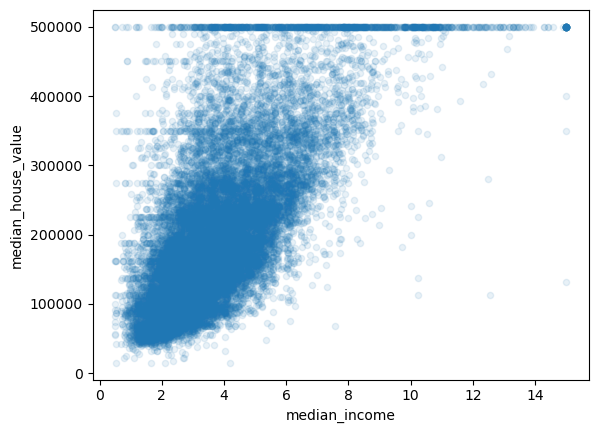

In [29]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [30]:
# Experiment with different attributes

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [31]:
corr_matrix = housing.corr()

In [190]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# Preparing Data for Machine Learning Algorithms

In [191]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [34]:
# Data Cleaning 
# housing.dropna(subset=["total_bedrooms"]) # Option 1
# housing.drop("total_bedrooms",axis=1) # Option 2
# median = housing["total_bedrooms"].median() # Option 3
# housing["total_bedrooms"].fillna(median,inplace=True)


In [192]:
# Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


# Since imputer only work on num values remove categorical attributes
housing_num = housing.drop("ocean_proximity",axis=1)

# Now fit imputer to training data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [193]:
# The result in statistics_ variable of imputer
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [194]:
housing_num.median().values

# Both are same

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
# Transform missing value to median of Data set
X = imputer.transform(housing_num)

In [39]:
# Converting Numpy's result into pandas Dataframe
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [40]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

# Handling Text and Categorical Attributes

In [41]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [42]:
# Convert Categorical into Num
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [43]:
# Get list of Categories
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
# One category which are similar is distant to solve this
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
# Convert Sparse Matix into Numpy Array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
# Custom Transformer
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix,bedrooms_ix, population_ix,households_ix =3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self,X,Y=None):
        return self # Nothing else to do
    
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/ X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]


In [48]:

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values) # --> Finding Extra Attributes such as room_per_household etc.


#### Also, housing_extra_attribs is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a DataFrame:

In [49]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


# Transformation Pipelines

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Numerical Attributes Pipeline
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [196]:
# Till now we have handled categorical and numerical attributes seperately
# Now we will use single Transformer for both types of attributes

from sklearn.compose import ColumnTransformer

num_attribs =list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])


housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
housing_prepared


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Select and Train a model

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)



LinearRegression()

In [54]:
housing_prepared.shape


(16512, 16)

In [55]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels Predictions:", list(some_labels))


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels Predictions: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [56]:
# Find Root mean square error

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_mse =np.sqrt(lin_mse)
lin_mse

68627.87390018745

### Observation: Underfitting Model

In [57]:
# Using Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)



DecisionTreeRegressor()

In [58]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

# Better Evaluation using Cross-Validation

In [59]:
# Using Cross Validation for Decision Tree Model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [60]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())
    
display_scores(tree_rmse_scores)

Scores:  [72196.24138176 71436.51227739 67565.03671271 72438.85006648
 70253.54009571 77801.2602694  71452.99088834 74094.35231339
 67635.70310136 71137.56372537]
Mean:  71601.20508319157
Standard Deviation:  2825.0363044740598


In [61]:
# Using Cross Validation for Linear Regression Model

scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.3282098180634


In [62]:
# Validating using RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [63]:

print("Predictions:", forest_reg.predict(some_data_prepared))

print("Labels Predictions:", list(some_labels))


Predictions: [ 77824. 291376.  82238. 124580. 231147.]
Labels Predictions: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [64]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse =np.sqrt(forest_rmse)
forest_rmse

18672.55502855103

In [65]:
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores:  [51619.37655731 48628.07291369 47108.46113863 51854.75719271
 47471.23891846 52219.84516558 52345.51234903 49767.22772534
 48486.46876004 54068.54360432]
Mean:  50356.95043251114
Standard Deviation:  2252.84996471346


# Fine Tune Model

In [66]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)


grid_search.fit(housing_prepared,housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [68]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

64745.095556334214 {'max_features': 2, 'n_estimators': 3}
55833.65337187725 {'max_features': 2, 'n_estimators': 10}
52795.77617824967 {'max_features': 2, 'n_estimators': 30}
60018.10836723311 {'max_features': 4, 'n_estimators': 3}
52656.2358410334 {'max_features': 4, 'n_estimators': 10}
50585.96282260395 {'max_features': 4, 'n_estimators': 30}
60036.94420612184 {'max_features': 6, 'n_estimators': 3}
51866.95219239123 {'max_features': 6, 'n_estimators': 10}
49876.4460596927 {'max_features': 6, 'n_estimators': 30}
57986.992458106324 {'max_features': 8, 'n_estimators': 3}
52241.67356237401 {'max_features': 8, 'n_estimators': 10}
50075.1414669817 {'max_features': 8, 'n_estimators': 30}
62523.12213941357 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53838.306194569144 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59237.761590590875 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52318.30428436336 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.14675093e-02, 6.83344368e-02, 4.35538175e-02, 1.90535184e-02,
       1.75562774e-02, 1.78737562e-02, 1.50478841e-02, 2.84151685e-01,
       7.79717384e-02, 1.10663887e-01, 9.02091544e-02, 7.65940905e-03,
       1.69968129e-01, 7.19664829e-05, 2.77431348e-03, 3.64251814e-03])

In [199]:
extra_attributes = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attributes + cat_one_hot_attribs

sorted(zip(feature_importances,attributes),reverse=True)


[(0.2841516847909905, 'median_income'),
 (0.16996812888432936, 'INLAND'),
 (0.11066388671769051, 'pop_per_hhold'),
 (0.09020915440467214, 'bedrooms_per_room'),
 (0.07797173839327809, 'rooms_per_hhold'),
 (0.07146750927247918, 'longitude'),
 (0.06833443675168097, 'latitude'),
 (0.04355381751451015, 'housing_median_age'),
 (0.019053518433806853, 'total_rooms'),
 (0.017873756248658883, 'population'),
 (0.01755627735219857, 'total_bedrooms'),
 (0.015047884086647225, 'households'),
 (0.007659409045543036, '<1H OCEAN'),
 (0.003642518135766112, 'NEAR OCEAN'),
 (0.0027743134848931634, 'NEAR BAY'),
 (7.196648285528924e-05, 'ISLAND')]

# Evaluate Your System on the Test Set

In [72]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict((X_test_prepared))

final_mse = mean_squared_error(y_test,final_predictions)
final_mse = np.sqrt(final_mse)

final_mse

48339.604865478024

In [73]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions-y_test) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([46362.9595753 , 50238.53875781])

# Exercise

# Answer 1

In [249]:

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'kernal' : ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
#     {'kernal' : ['rbf'], 'C' : [1.0, 3.0, 10., 30., 100., 300., 1000.0], 'gamma' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
# ]
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_reg = SVR()
gridSearch = GridSearchCV(svr_reg,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=2)
gridSearch.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   8.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   7.7s
[CV] END .............................C=100.0, kernel=linear; total time=   7.6s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  15.9s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  15.8s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  15.7s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  15.7s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  15.6s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  15.6s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  15.8s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  15.6s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  16.4s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  17.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  15.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  15.4s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  16.7s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  16.5s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  14.1s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  15.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  14.6s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  14.6s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  20.7s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  20.8s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  17.4s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  18.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  17.8s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  16.6s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
result = gridSearch.cv_results_
for mean_score, params in zip(result["mean_test_score"],result["params"]):
    print(np.sqrt(-mean_score),params)

In [248]:
gridSearch.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
svr_rmse_scores = np.sqrt(-gridSearch.best_score_)
svr_rmse_scores

# Answer 2

In [244]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_dist = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
}
svr = SVR()
randomSearch = RandomizedSearchCV(svr,param_distributions=param_dist, 
                                n_iter=50,cv=5, scoring='neg_mean_squared_error',
                                verbose=2,random_state=50)
randomSearch.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=1902.9903141400719, gamma=0.25887838300228516, kernel=rbf; total time=  15.4s
[CV] END C=1902.9903141400719, gamma=0.25887838300228516, kernel=rbf; total time=  15.5s
[CV] END C=1902.9903141400719, gamma=0.25887838300228516, kernel=rbf; total time=  15.1s
[CV] END C=1902.9903141400719, gamma=0.25887838300228516, kernel=rbf; total time=  14.6s
[CV] END C=1902.9903141400719, gamma=0.25887838300228516, kernel=rbf; total time=  14.8s
[CV] END C=5505.319479500164, gamma=0.02166932529587966, kernel=linear; total time=   9.7s


KeyboardInterrupt: 

In [243]:
negative_mse = randomSearch.best_score_
rmse = np.sqrt(-negative_mse)
rmse

NameError: name 'randomSearch' is not defined

In [147]:
feature_importances

array([7.14675093e-02, 6.83344368e-02, 4.35538175e-02, 1.90535184e-02,
       1.75562774e-02, 1.78737562e-02, 1.50478841e-02, 2.84151685e-01,
       7.79717384e-02, 1.10663887e-01, 9.02091544e-02, 7.65940905e-03,
       1.69968129e-01, 7.19664829e-05, 2.77431348e-03, 3.64251814e-03])

# Answer 3

In [103]:
import numpy as np
xm = np.array([3,4,1,2]) # 1. First sort array => [1,2,3,4]
                         # 2. then pick kth = 3 which is 4 of sorted array
                         # 3. partition by 4 with element index of original (xm array) => [2,3,0,1]
print(np.partition(xm,3))
np.argpartition(xm,3)

[1 2 3 4]


array([2, 3, 0, 1])

In [181]:
from sklearn.base import BaseEstimator, TransformerMixin
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class importantAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,feature_importances,k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self,X,y=None):
        self.feature_indices_= indices_of_top_k(self.feature_importances,self.k)
        return self
    def transform(self,X):
         return X[:, self.feature_indices_]
    

In [200]:
k = 5

# argArray = np.argpartition(feature_importances,k) # => [1,0,9,12,7]
# print(argArray)
# np.sort(argArray)   



In [206]:
# Getting feature importance index
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 7,  8,  9, 10, 12])

In [215]:
np.array(attributes) [top_k_feature_indices]

array(['median_income', 'rooms_per_hhold', 'pop_per_hhold',
       'bedrooms_per_room', 'INLAND'], dtype='<U18')

In [217]:
feature_importance_score = np.array(feature_importances)[top_k_feature_indices]
feature_importance_score

array([0.28415168, 0.07797174, 0.11066389, 0.09020915, 0.16996813])

In [80]:
sorted(zip(feature_importances,attributes),reverse=True)[:k]

[(0.2841516847909905, 'median_income'),
 (0.16996812888432936, 'INLAND'),
 (0.11066388671769051, 'pop_per_hhold'),
 (0.09020915440467214, 'bedrooms_per_room'),
 (0.07797173839327809, 'rooms_per_hhold')]

In [227]:
preperation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', importantAttributesAdder(feature_importances,k))
])

In [228]:
housing_prepared_top_k_feature =  preperation_and_feature_selection_pipeline.fit_transform(housing)

In [229]:
pd.DataFrame(housing_prepared_top_k_feature[0:3],columns=np.array(attributes)[top_k_feature_indices])

,median_income,rooms_per_hhold,pop_per_hhold,bedrooms_per_room,INLAND
0,-0.893647,0.017395,0.006223,-0.121122,1.0
1,1.292168,0.569256,-0.040811,-0.810867,0.0
2,-0.525434,-0.018024,-0.075371,-0.338273,1.0


In [219]:
housing_prepared[0:3,top_k_feature_indices]


array([[-0.8936472 ,  0.01739526,  0.00622264, -0.12112176,  1.        ],
       [ 1.292168  ,  0.56925554, -0.04081077, -0.81086696,  0.        ],
       [-0.52543365, -0.01802432, -0.07537122, -0.33827252,  1.        ]])

## Observation:

### Transformation Pipeline and Function result is same (correct)

# Answer 4

In [235]:
# from sklearn.base import BaseEstimator, TransformerMixin

# def final_prediction(arr):
#     final_predictions = final_model.predict((X_test_prepared))
#     final_mse = mean_squared_error(y_test,final_predictions)
#     final_mse = np.sqrt(final_mse)
#     return final_mse
    
# class finalPrediction(BaseEstimator,TransformerMixin):
#     def __init__(self,test_data_set):
#         self.test_data_set = test_data_set
#     def fit(self,X):
#         self.test_data_set_result = final_prediction(self.test_data_set)
#         return self
    
#     def transform(self,X):
#         return self.test_data_set_result
        
    

In [253]:
preperation_with_prediction = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', importantAttributesAdder(feature_importances,k)),
    ('svm_reg', SVR(**gridSearch.best_params_))
])

In [254]:
result = preperation_with_prediction.fit(housing,housing_labels)

In [261]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]


In [268]:
print("Predictions:\t", preperation_with_prediction.predict(some_data))
print("Labels:\t\t", list(some_labels))


Predictions:	 [ 72539.37585993 306816.57303157 104221.51402944 164140.60388192]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


## Observation
### Completed Full Pipeline + used SVM with GridSearch insted of RandomSearch